In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d import Axes3D

from skimage import measure
from skimage.draw import ellipsoid
import cactas as C
import nrrd

In [2]:
DATAPATH = '/raid/mpsych/CACTAS/DATA/CA20/'

In [3]:
seg = C.Helper.load_seg_data(DATAPATH)

In [4]:
d = DATAPATH + seg[1]

In [5]:
data, header = nrrd.read(d)

13.ca.seg.nrrd


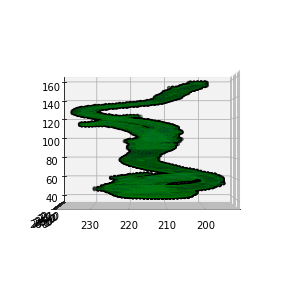

55.ca.seg.nrrd


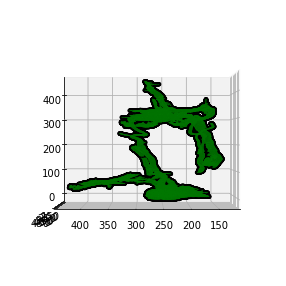

18.ca.seg.nrrd


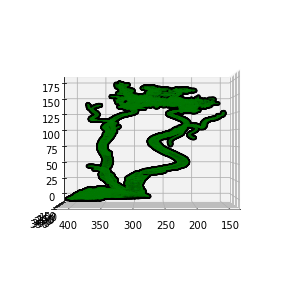

47.ca.seg.nrrd


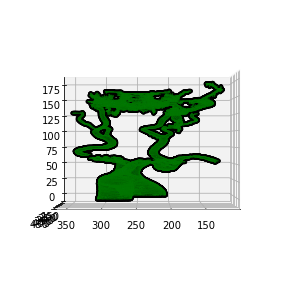

60.ca.seg.nrrd


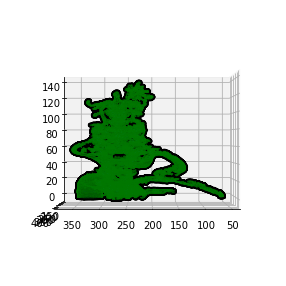

35.ca.seg.nrrd


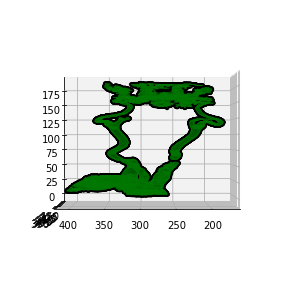

16.ca.seg.nrrd


In [ ]:
for i in range(70):
    d = DATAPATH + seg[i]
    data, header = nrrd.read(d)
    
    min_val, max_val = data.min(), data.max()
    isovalue = (min_val + max_val) / 2 
    
    if isovalue != 0:
        vertices, faces, normals, values = measure.marching_cubes(data, isovalue)
        print(seg[i])
        
        fig = plt.figure(figsize=(5, 5))
        ax = fig.add_subplot(111, projection='3d')

        ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], color='black', s=10)

        mesh = Poly3DCollection(vertices[faces], linewidths=0.05, edgecolors='green', alpha=0.1)
        ax.add_collection3d(mesh)
        
        ax.view_init(elev=0, azim=90)

        plt.show()